In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_suicide_detection = pd.read_csv('../../data/prepared/prepared.csv').drop('Unnamed: 0',axis=1)
df_suicide_detection['corpus'] = df_suicide_detection['corpus'].apply(lambda x: x[1:-1].replace("'", "").split(', '))

In [4]:
df_suicide_detection['length'] = df_suicide_detection['text'].apply(lambda x: len(x.split()))
df_suicide_detection['post_length'] = df_suicide_detection['corpus'].apply(lambda x: len(x))

In [5]:
data_suicide = df_suicide_detection[df_suicide_detection['class'] == 1]
data_non_suicide = df_suicide_detection[df_suicide_detection['class'] == 0]

In [21]:
len_documents = pd.concat(
    [data_suicide['length'].reset_index().drop('index',axis=1),
    data_non_suicide['length'].reset_index().drop('index',axis=1),
    data_suicide['post_length'].reset_index().drop('index',axis=1),
    data_non_suicide['post_length'].reset_index().drop('index',axis=1)],
    axis=1
)
len_documents.columns = ["suicide","non_suicide","suicide_preprocesing", "non_suicide_preprocessing"]
len_documents.describe().drop('count')

,suicide,non_suicide,suicide_preprocesing,non_suicide_preprocessing
mean,202.675782,61.190558,95.277108,30.987931
std,255.314824,139.284144,117.905116,118.616391
min,1.000000,2.000000,1.000000,1.000000
25%,60.000000,19.000000,29.000000,10.000000
50%,127.000000,31.000000,60.000000,16.000000
75%,251.000000,60.000000,118.000000,30.000000
max,9684.000000,8220.000000,3873.000000,18144.000000


In [25]:
len_documents.quantile(0.9)

suicide                      446.0
non_suicide                  126.0
suicide_preprocesing         210.0
non_suicide_preprocessing     60.0
Name: 0.9, dtype: float64

Display only below 0.9 quartiles for readability 

In [34]:
length = df_suicide_detection[df_suicide_detection['length']<df_suicide_detection['length'].quantile(0.9)]
post_length = df_suicide_detection[df_suicide_detection['post_length']<df_suicide_detection['post_length'].quantile(0.9)]


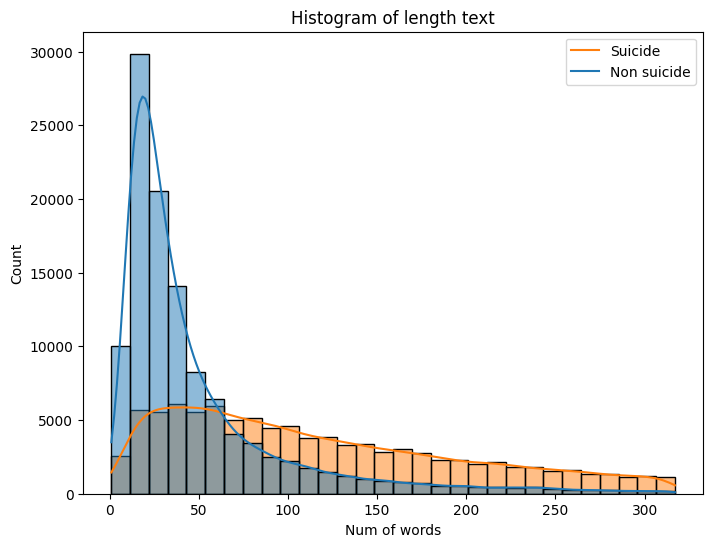

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(data=length, x='length', hue='class', bins=30, kde=True)
plt.legend(['Suicide','Non suicide'])
plt.title('Histogram of length text')
plt.xlabel('Num of words')
plt.show()

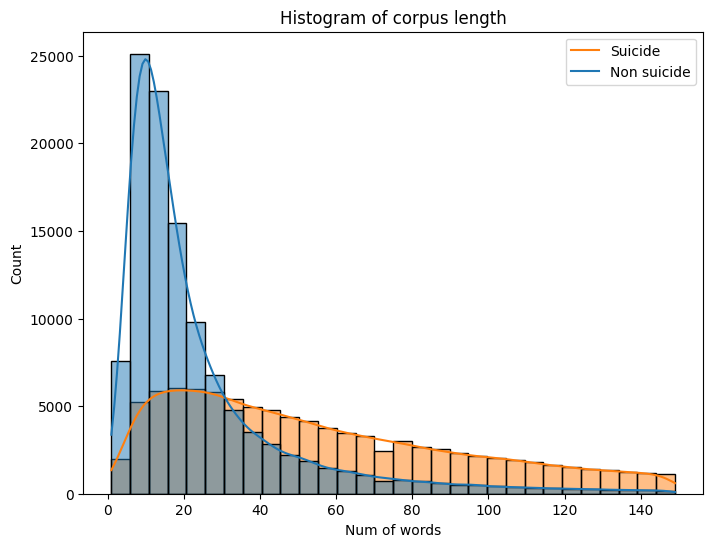

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(data=post_length, x='post_length', hue='class', bins=30, kde=True)
plt.legend(['Suicide','Non suicide'])
plt.title('Histogram of corpus length')
plt.xlabel('Num of words')
plt.show()